In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.001, 0.04) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short #* seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.176, 0.230) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        #period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long #* seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)
local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha
local_variation.lengthscale = local_variation_lengthscale

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)


covar_module = local_variation #+ local_variation_2

In [3]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('uv_sigma_line_eg_30T', 30, True)

In [ ]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='uv_sigma_line_eg',
    update_score=False
)   

In [ ]:
mse, mape

## 15 minutes

In [5]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('uv_sigma_line_eg_15T', 15, True)

In [6]:
period_constraint_short1 = gpytorch.constraints.Interval(0.01145, 0.01146)
per1 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short1)
period_constraint_short2 = gpytorch.constraints.Interval(0.01354, 0.01355)
per2 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short2)
period_constraint_short3 = gpytorch.constraints.Interval(0.01562, 0.01563)
per3 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short3)

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        #period_length_constraint=period_constraint_short
        )
    )

covar_module = gpytorch.kernels.ScaleKernel(per1 + per2 + per3) + local_variation

Iter 1 , Loss = 1.4548084154517409 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.4064470188465723 , Noise = 0.6882597208023071
Iter 3 , Loss = 1.4559134787665906 , Noise = 0.6834554076194763
Iter 4 , Loss = 1.4543795901490746 , Noise = 0.6788475513458252
Iter 5 , Loss = 1.4488671585411372 , Noise = 0.6743890047073364
Iter 6 , Loss = 1.4475597895393275 , Noise = 0.6700062155723572
Iter 7 , Loss = 1.437322092356718 , Noise = 0.6656827330589294
Iter 8 , Loss = 1.4038743514424077 , Noise = 0.6613478660583496
Iter 9 , Loss = 1.4244584723705453 , Noise = 0.6568664908409119
Iter 10 , Loss = 1.444754534780273 , Noise = 0.652397096157074
Iter 11 , Loss = 1.4425468353353286 , Noise = 0.6481509208679199
Iter 12 , Loss = 1.442241153857245 , Noise = 0.6441124677658081
Iter 13 , Loss = 1.4444810529553032 , Noise = 0.6402971148490906
Iter 14 , Loss = 1.4440423032723142 , Noise = 0.6367669105529785
Iter 15 , Loss = 1.4441020274121752 , Noise = 0.6334928870201111
Iter 16 , Loss = 1.4432131153807424 , 

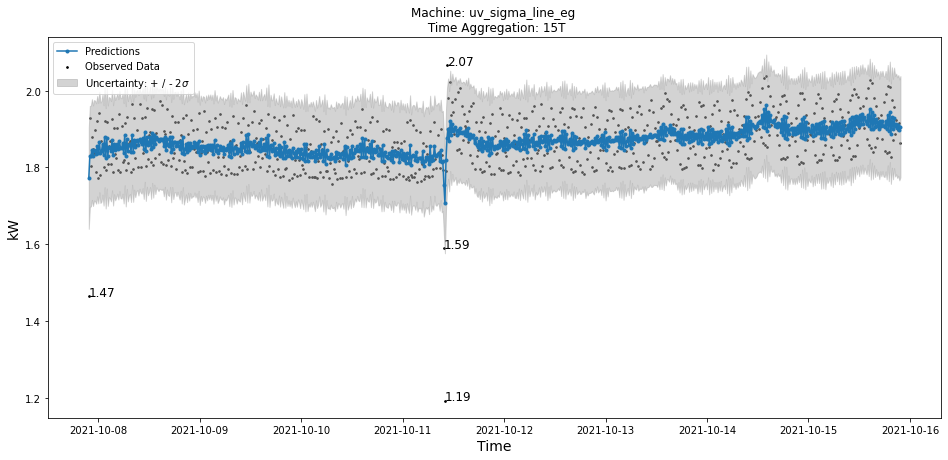

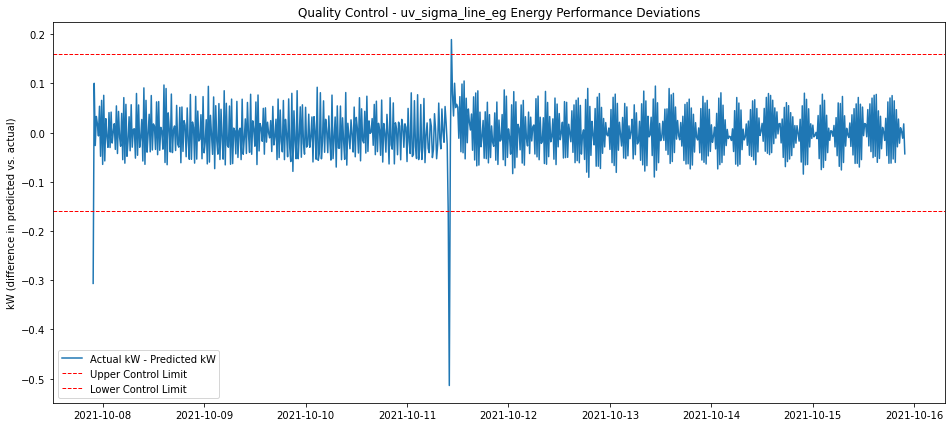

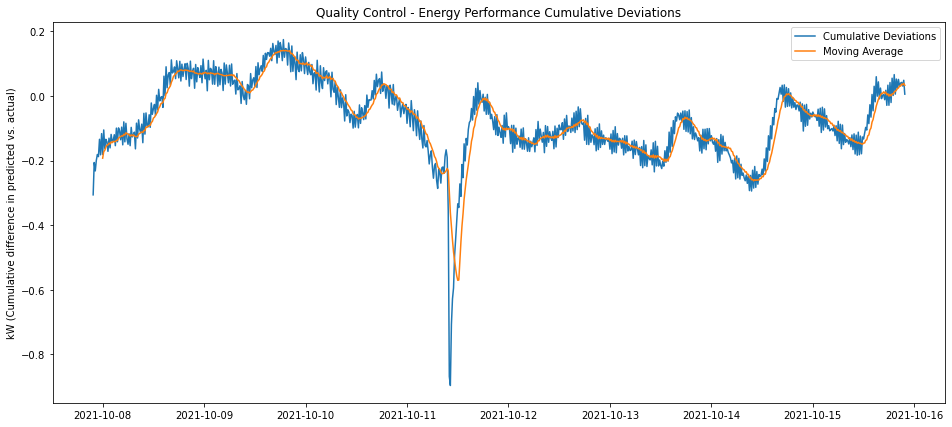

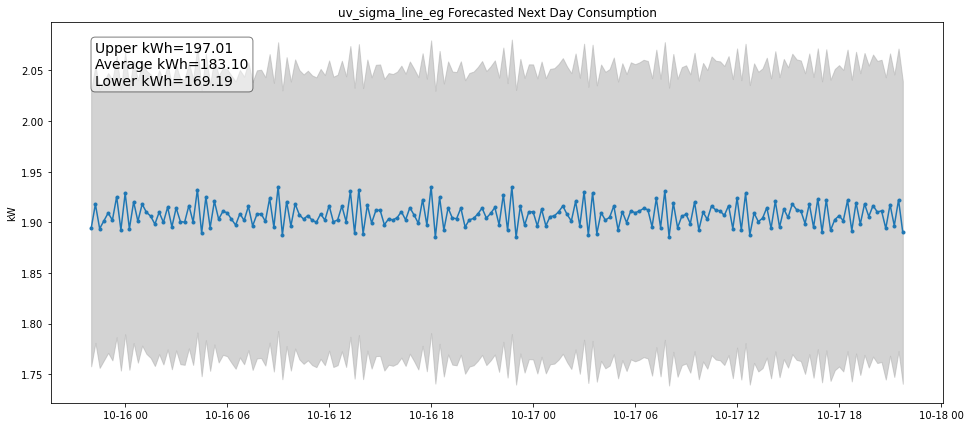

In [7]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    lr=0.01,
    training_iter=100,
    time_agg='15T',
    machine='uv_sigma_line_eg',
    update_score=False
)   

In [9]:
mse, mape

(0.004271353802596223, 0.029860016440790813)